In [71]:
import pandas as pd

In [72]:
datos = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv")

In [73]:
datos

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [74]:
datos.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

In [75]:
datos.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


In [76]:
%matplotlib inline
import matplotlib.pyplot as plt

<AxesSubplot:>

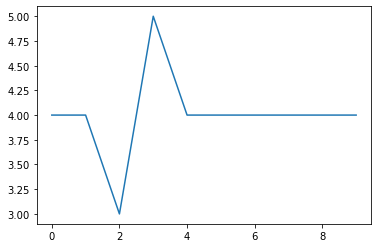

In [77]:
datos["Doors"].plot()

<AxesSubplot:>

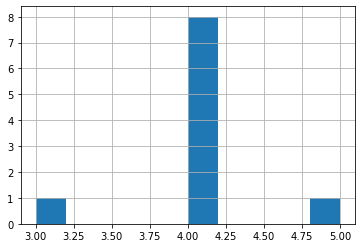

In [78]:
datos["Doors"].hist()

In [79]:
datos[(datos["Doors"]>3) & (datos["Doors"]<5)]


,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


## Corrige una columna

In [105]:
datos["Make"].str[:-2]

0    Toyo
1     Hon
2    Toyo
3       B
4    Niss
5    Toyo
6     Hon
7     Hon
8    Toyo
9    Niss
Name: Make, dtype: object

### Actualiza columna eliminando caracteres raros y convirtiendo el tipo a numerico

In [80]:
datos["Price"]=datos["Price"].str.replace("[\$\,]", "").astype("float")

## Filtra por varias columnas

In [81]:
datos[(datos["Doors"]==3) | (datos["Doors"]==5)]

,Make,Colour,Odometer (KM),Doors,Price
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0


## Crea columna calculada

In [82]:
datos["nueva"] = datos["Doors"] + 1
datos

,Make,Colour,Odometer (KM),Doors,Price,nueva
0,Toyota,White,150043,4,4000.0,5
1,Honda,Red,87899,4,5000.0,5
2,Toyota,Blue,32549,3,7000.0,4
3,BMW,Black,11179,5,22000.0,6
4,Nissan,White,213095,4,3500.0,5
5,Toyota,Green,99213,4,4500.0,5
6,Honda,Blue,45698,4,7500.0,5
7,Honda,Blue,54738,4,7000.0,5
8,Toyota,White,60000,4,6250.0,5
9,Nissan,White,31600,4,9700.0,5


## Borra columna

In [83]:
datos.drop("nueva", axis=1)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000.0
1,Honda,Red,87899,4,5000.0
2,Toyota,Blue,32549,3,7000.0
3,BMW,Black,11179,5,22000.0
4,Nissan,White,213095,4,3500.0
5,Toyota,Green,99213,4,4500.0
6,Honda,Blue,45698,4,7500.0
7,Honda,Blue,54738,4,7000.0
8,Toyota,White,60000,4,6250.0
9,Nissan,White,31600,4,9700.0


## Exporta dataframe a csv

In [84]:
datos.to_csv("salida.csv",index=False)

## Tratamientos con datos vacios

In [85]:
mi_serie = pd.Series([1,2,3])
datos["otra_nueva"] = mi_serie
datos

,Make,Colour,Odometer (KM),Doors,Price,nueva,otra_nueva
0,Toyota,White,150043,4,4000.0,5,1.0
1,Honda,Red,87899,4,5000.0,5,2.0
2,Toyota,Blue,32549,3,7000.0,4,3.0
3,BMW,Black,11179,5,22000.0,6,NaN
4,Nissan,White,213095,4,3500.0,5,NaN
5,Toyota,Green,99213,4,4500.0,5,NaN
6,Honda,Blue,45698,4,7500.0,5,NaN
7,Honda,Blue,54738,4,7000.0,5,NaN
8,Toyota,White,60000,4,6250.0,5,NaN
9,Nissan,White,31600,4,9700.0,5,NaN


In [86]:
datos["otra_nueva"].dropna()

0    1.0
1    2.0
2    3.0
Name: otra_nueva, dtype: float64

In [87]:
datos["otra_nueva"].fillna(0)

0    1.0
1    2.0
2    3.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: otra_nueva, dtype: float64

In [88]:
datos["otra_nueva"].fillna(datos["otra_nueva"].mean())

0    1.0
1    2.0
2    3.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: otra_nueva, dtype: float64

## Crea tabla cruzada

In [89]:
pd.crosstab(datos["Make"], datos["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


## Muestras aleatorias

### 50 % de los registros aleatorios

In [97]:
datos.sample(frac=0.5)

,Make,Colour,Odometer (KM),Doors,Price,nueva,otra_nueva
4,Nissan,White,213095,4,3500.0,5,NaN
7,Honda,Blue,54738,4,7000.0,5,NaN
5,Toyota,Green,99213,4,4500.0,5,NaN
1,Honda,Red,87899,4,5000.0,5,2.0
0,Toyota,White,150043,4,4000.0,5,1.0


## Funciones lambda

In [113]:
datos["Price"].apply(lambda x: x*1.21)

0     4840.0
1     6050.0
2     8470.0
3    26620.0
4     4235.0
5     5445.0
6     9075.0
7     8470.0
8     7562.5
9    11737.0
Name: Price, dtype: float64